In [1]:
import os
import h5py
import pylab
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
time = np.arange(-5,11,1)

In [4]:
time

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
lnb_330={}
lnb_220={}
lnb_440={}
lnb_221={}
lnb_210={}

In [17]:
for t in time:
    if t<0:
        name = 'M'+str(-t)+'MS'
    else:
        name = str(t)+'MS'
    try:
        f220=h5py.File('./220/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f330=h5py.File('./220_330/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f440=h5py.File('./220_440/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f221=h5py.File('./220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f210=h5py.File('./220_210/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        lnb_220[t]=f220.attrs['log_evidence']
        lnb_330[t]=f330.attrs['log_evidence']
        lnb_440[t]=f440.attrs['log_evidence']
        lnb_221[t]=f221.attrs['log_evidence']
        lnb_210[t]=f210.attrs['log_evidence']
    except FileNotFoundError:
        pass
    

In [18]:
lnb_220

{-5: -662253.8786988108,
 -4: -662254.1852890821,
 -3: -662253.5743676542,
 -2: -662245.1308241272,
 0: -662245.7115038399,
 3: -662238.400704488,
 4: -662235.784331915,
 7: -662233.1330764111,
 9: -662232.6739125015,
 10: -662236.212243099}

In [19]:
lnb_330

{-5: -662251.6365295593,
 -4: -662251.7579998629,
 -3: -662251.0343008601,
 -2: -662245.0527045517,
 0: -662244.5644746877,
 3: -662239.1432666015,
 4: -662236.3149728669,
 7: -662233.2444741467,
 9: -662232.5387542822,
 10: -662236.4185366953}

In [20]:
lnb_440

{-5: -662254.9854846701,
 -4: -662255.2610523782,
 -3: -662254.8823143067,
 -2: -662245.7227997081,
 0: -662245.2284945761,
 3: -662238.3345849905,
 4: -662235.8131851105,
 7: -662233.6937958247,
 9: -662232.0464381833,
 10: -662235.8286707527}

In [21]:
lnb_210

{-5: -662248.4096610728,
 -4: -662245.9758471128,
 -3: -662246.9728565377,
 -2: -662243.0868858792,
 0: -662243.2213418493,
 3: -662237.9454401821,
 4: -662235.6347487906,
 7: -662233.0049043855,
 9: -662232.6179135079,
 10: -662236.1276648011}

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

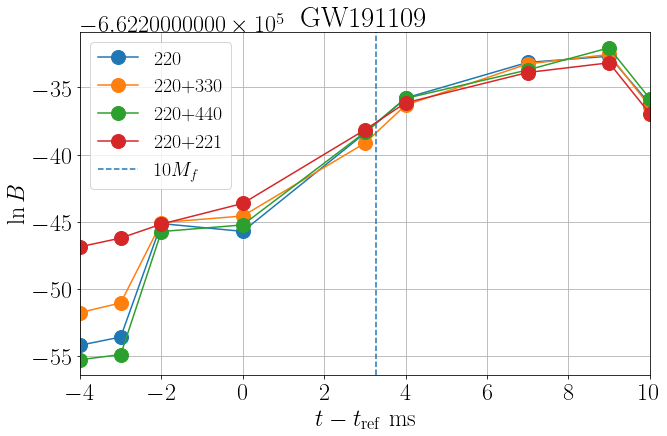

In [22]:
label=['220','220+330','220+440','220+221','220+210']
for i,dic in enumerate([lnb_220,lnb_330,lnb_440,lnb_221]):
    x,y=zip(*dic.items())
    plt.plot(x,y,label=label[i],marker='o')
#plt.scatter(4,threemode.attrs['log_evidence'],marker='^',color='black',label='220+330+440')
plt.axvline(0.003271797742434115*1000,ls='--',label='$10M_f$')
plt.legend()
plt.title('GW191109')
plt.ylabel('$\ln B$')
plt.xlim(-4,10)
plt.xlabel('$t-t_\mathrm{ref}$ ms')